### **Objective**
### Explore the relationship between trader performance and market sentiment, uncover hidden patterns, and deliver insights that can drive  smarter trading strategies.

### Importing (library ,dataset)
- Importing historical_data

- Importing fear_greed_index

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns

In [2]:
data1=pd.read_csv("fear_greed_index.csv")

In [3]:
data2=pd.read_csv("historical_dataset.csv")

### Exploring and merging dataset

In [4]:
data1.dtypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

In [5]:
data1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


In [6]:
data2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,OnlyDate,Matching data,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,02-12-2024 00:00,02-12-2024,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,02-12-2024 00:00,02-12-2024,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,02-12-2024 00:00,02-12-2024,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,02-12-2024 00:00,02-12-2024,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,02-12-2024 00:00,02-12-2024,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
data2.dtypes

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
OnlyDate             object
Matching data        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

In [8]:
da_shape1=data1.shape
da_shape2=data2.shape

print(da_shape1)
print(da_shape2)

(2644, 4)
(211224, 18)


In [9]:
merged_df=pd.merge(data1,data2,left_on='date',right_on='Matching data',how='inner')

In [10]:
merged_df.shape

(211218, 22)

In [11]:
merged_df.dtypes

timestamp             int64
value                 int64
classification       object
date                 object
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
OnlyDate             object
Matching data        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

In [12]:
merged_df.isnull().sum()

timestamp           0
value               0
classification      0
date                0
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
OnlyDate            0
Matching data       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [13]:
text_col=merged_df.dtypes[merged_df.dtypes=='object'].index
text_col

Index(['classification', 'date', 'Account', 'Coin', 'Side', 'Timestamp IST',
       'OnlyDate', 'Matching data', 'Direction', 'Transaction Hash'],
      dtype='object')

In [14]:
for i in text_col:
    counts=merged_df[i].value_counts()
    print(counts)

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64
date
25-02-2025    6246
23-04-2025    6159
24-02-2025    5616
12-03-2025    3968
09-04-2025    3967
              ... 
08-09-2024       1
04-10-2024       1
11-09-2024       1
05-09-2024       1
08-07-2024       1
Name: count, Length: 479, dtype: int64
Account
0xbee1707d6b44d4d52bfe19e41f8a828645437aab      40184
0xbaaaf6571ab7d571043ff1e313a9609a10637864      21192
0xa0feb3725a9335f49874d7cd8eaad6be45b27416      15605
0x8477e447846c758f5a675856001ea72298fd9cb5      14998
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23      14726
0x28736f43f1e871e6aa8b1148d38d4994275d72c4      13311
0x513b8629fe877bb581bf244e326a047b249c4ff1      12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4       9893
0x47add9a56df66b524d5e2c1993a43cde53b6ed85       8519
0x4f93fead39b70a1824f981a54d4e55b278e9f760       7584
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd 

In [15]:
check_count=['Side', 'Direction','classification','Account','Trade ID']

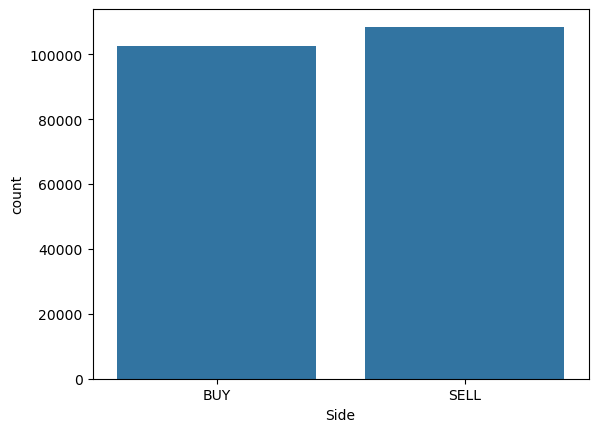

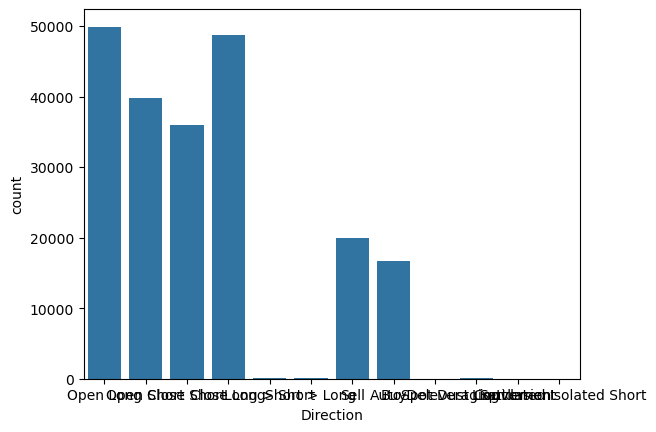

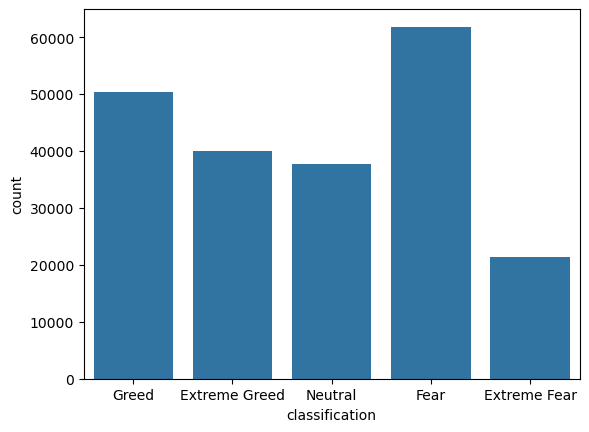

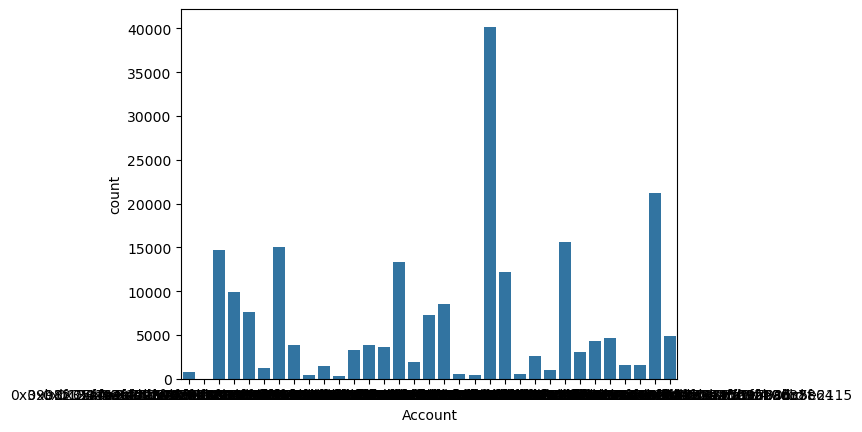

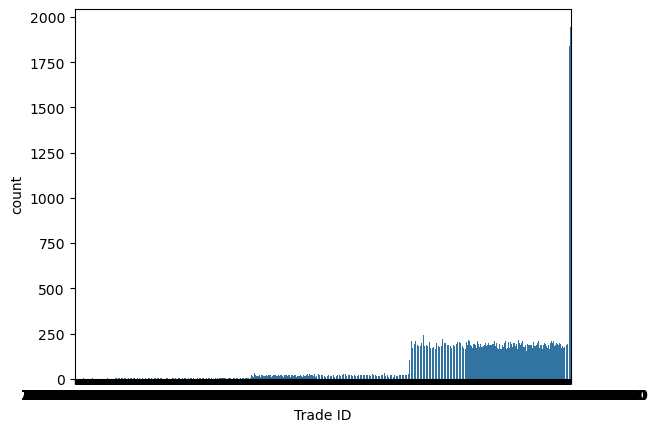

In [16]:
for i in check_count:
    sns.countplot(x=merged_df[i])
    plt.yticks(fontsize=10)
    plt.show()
    

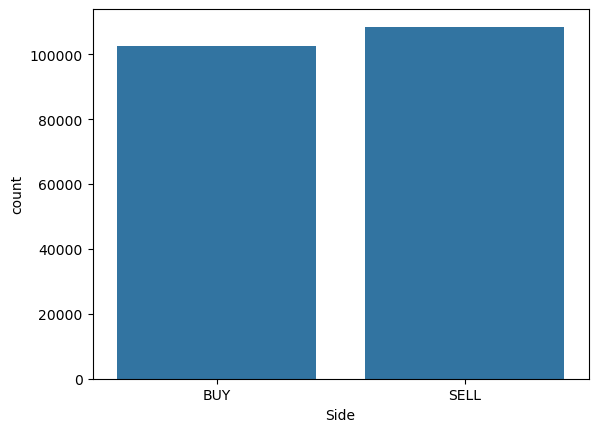

In [17]:
sns.countplot(x=merged_df["Side"])
plt.yticks(fontsize=10)
plt.show()

In [18]:
cla_order=merged_df['classification'].value_counts().index

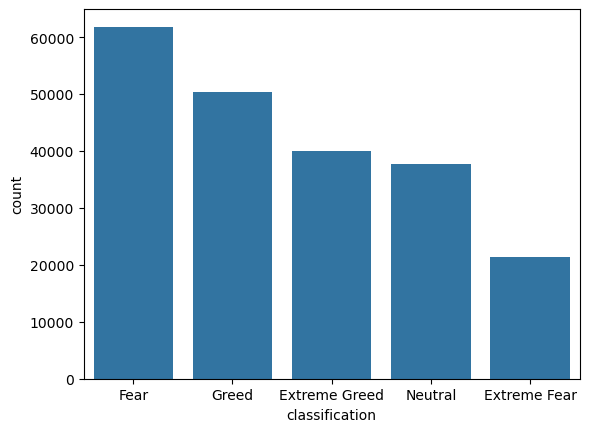

In [19]:
sns.countplot(x=merged_df["classification"],order=cla_order)
plt.yticks(fontsize=10)
plt.show()

In [20]:
direction_order = merged_df['Direction'].value_counts().index
direction_order

Index(['Open Long', 'Close Long', 'Open Short', 'Close Short', 'Sell', 'Buy',
       'Spot Dust Conversion', 'Short > Long', 'Long > Short',
       'Auto-Deleveraging', 'Settlement', 'Liquidated Isolated Short'],
      dtype='object', name='Direction')

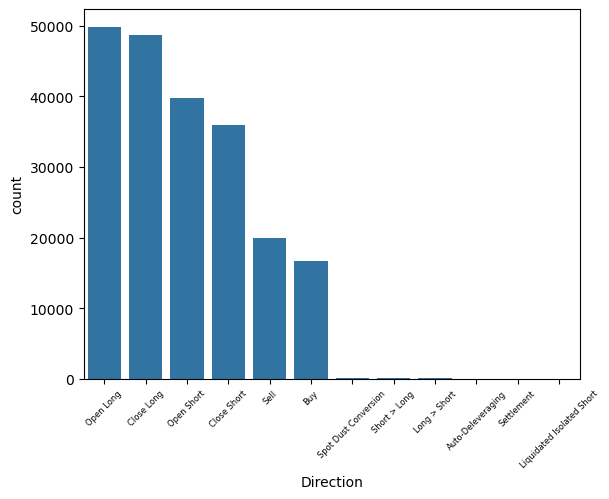

In [21]:
sns.countplot(x=merged_df['Direction'],order=direction_order)
plt.yticks(fontsize=10)
plt.xticks(fontsize=6,rotation=45)
plt.show()

In [22]:
acc_order=merged_df['Account'].value_counts().index

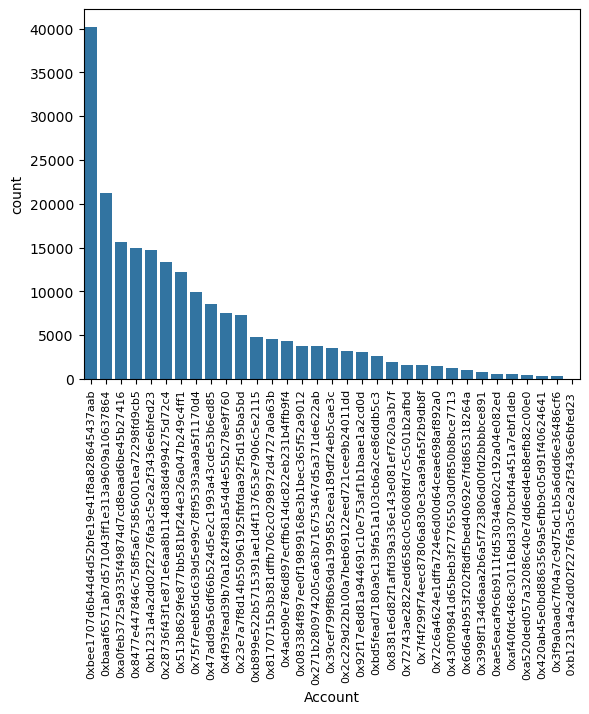

In [23]:
sns.countplot(x=merged_df['Account'],order=acc_order)
plt.xticks(fontsize=8,rotation=90)
plt.show()

- There are more than 40k records of same Trader account 

## Sentiment Analysis with Trader Performance data

### Total traded amount for each classification

,classification,Size USD
0,Extreme Fear,1.144843e+08
1,Extreme Greed,1.244652e+08
4,Neutral,1.802421e+08
3,Greed,2.885825e+08
2,Fear,4.833248e+08


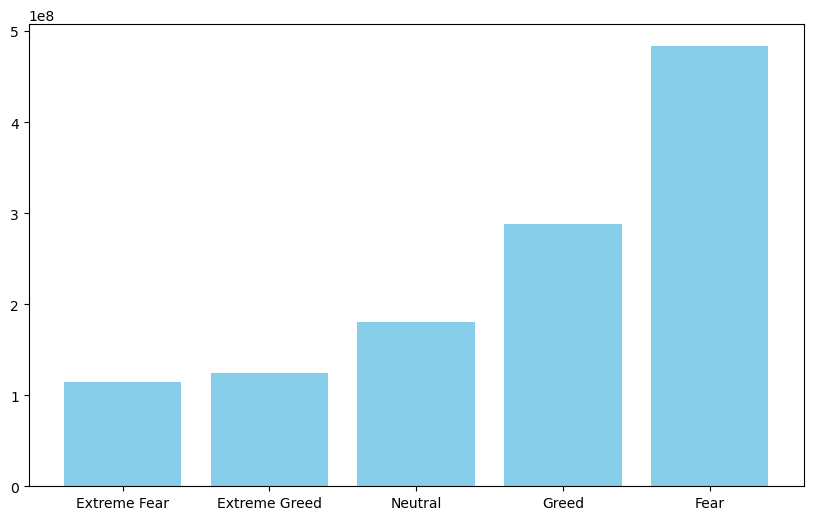

In [24]:
group=merged_df.groupby("classification")["Size USD"].sum().reset_index().sort_values(by="Size USD")
plt.figure(figsize=(10,6))
plt.bar(group["classification"],group["Size USD"],color='skyblue')
group

- from this chart we get traded buy or sell coin more on the day pf fear and greed
  
- Still it is incomplete parameter as we don't know how much person sales and buy coin

C:\Users\swapn\AppData\Local\Temp\ipykernel_22420\1132237548.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=merged_df["classification"],color='skyblue',data=merged_df,hue='Side')


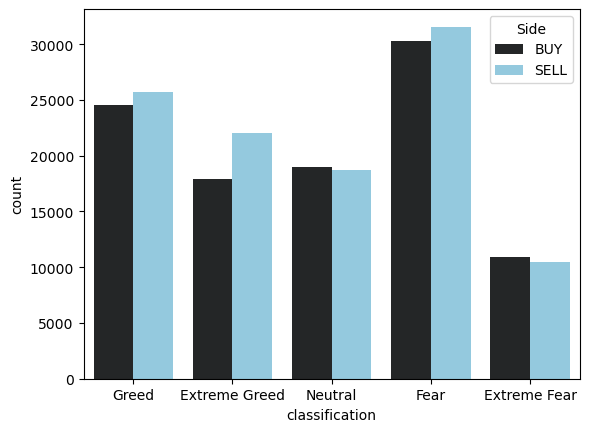

In [25]:
sns.countplot(x=merged_df["classification"],color='skyblue',data=merged_df,hue='Side')
plt.show()

- We can see overall total of fear and greedy records are high i.e. trading operation are higher compaire to other classification category

- So it leads to covey that total sum is less reliable madtrics

- So for better analysis we have to consider average

- Also buy and sell operation are nearly eqlual and there is vary small difference in there count for every classification

### Average traded amount for each classification

,classification,Size USD
1,Extreme Greed,3112.251565
4,Neutral,4782.732661
0,Extreme Fear,5349.731843
3,Greed,5736.884375
2,Fear,7816.109931


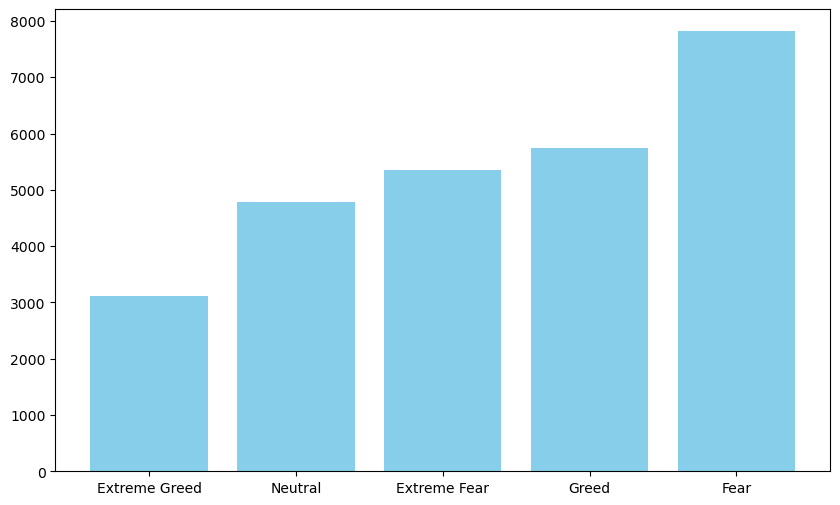

In [26]:
group_avg=merged_df.groupby("classification")["Size USD"].mean().reset_index().sort_values(by="Size USD")

plt.figure(figsize=(10,6))
plt.bar(group_avg["classification"],group_avg["Size USD"],color='skyblue')
group_avg

- We can conclude from above chart there are more trade operation occur on fear and greed sentiment

- Also there is possibilty that high amount of trade size hapeens on this sentiment

### Total Profit & Loss of that trade for each Classification

,classification,Closed PnL
0,Extreme Fear,7.391102e+05
4,Neutral,1.292921e+06
3,Greed,2.150129e+06
1,Extreme Greed,2.715171e+06
2,Fear,3.357155e+06


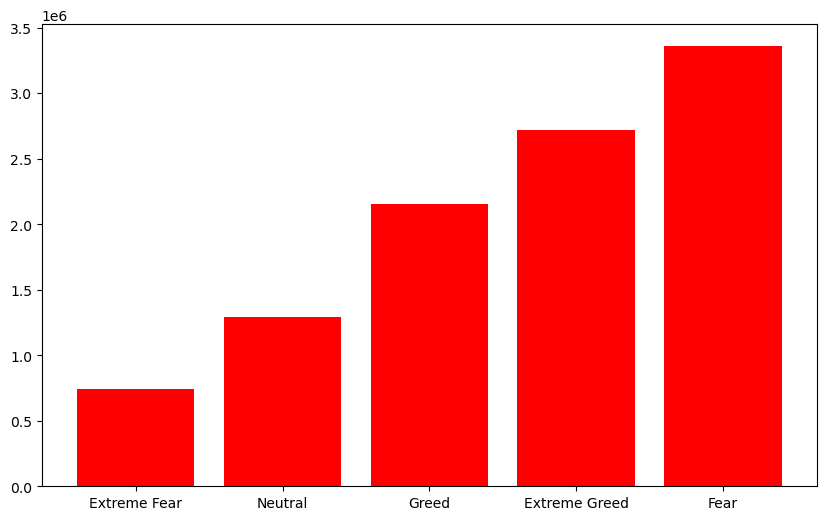

In [27]:
group_1=merged_df.groupby("classification")["Closed PnL"].sum().reset_index().sort_values(by="Closed PnL")

plt.figure(figsize=(10,6))
plt.bar(group_1["classification"],group_1["Closed PnL"],color='red')

group_1

- Here we get that total closed profit after operation is better for fear and extreme greed

- But sum is not reliable matrics so we will consider average next for better understanding

### Average Profit & Loss of that trade for each Classification

,classification,Closed PnL
4,Neutral,34.307718
0,Extreme Fear,34.537862
3,Greed,42.743559
2,Fear,54.290400
1,Extreme Greed,67.892861


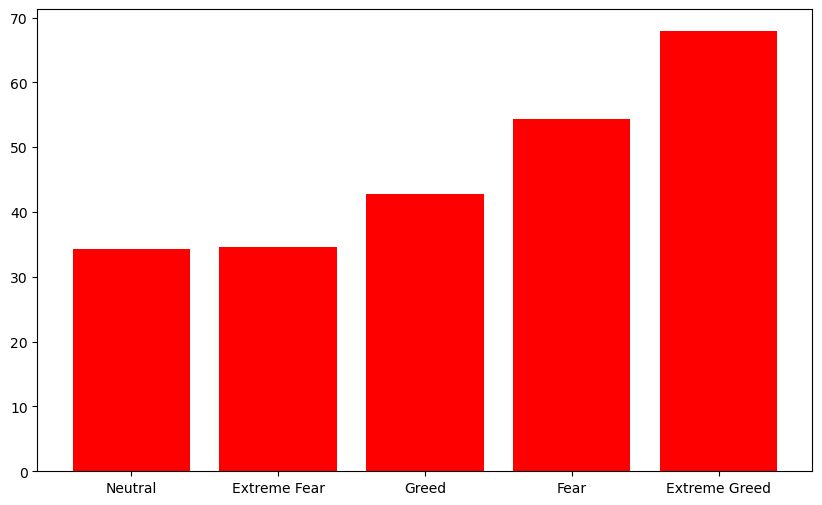

In [39]:
group_1avg=merged_df.groupby("classification")["Closed PnL"].mean().reset_index().sort_values(by="Closed PnL")

plt.figure(figsize=(10,6))
plt.bar(group_1avg["classification"],group_1avg["Closed PnL"],color='red')
group_1avg

- Average profit for closed PnL is better for Extreme Greed and Fear

- So we can say that marget is getting good profit in etreme greed and fear sentiment days

- Also for neutral days it making worst performance followed by Extreme fear days

### By Side(buy/sell) metric

  classification  Side  Closed PnL
2  Extreme Greed   BUY   10.498927
6          Greed   BUY   25.002302
8        Neutral   BUY   29.227429
0   Extreme Fear   BUY   34.114627
1   Extreme Fear  SELL   34.980106
9        Neutral  SELL   39.456408
5           Fear  SELL   45.049641
7          Greed  SELL   59.691091
4           Fear   BUY   63.927104
3  Extreme Greed  SELL  114.584643


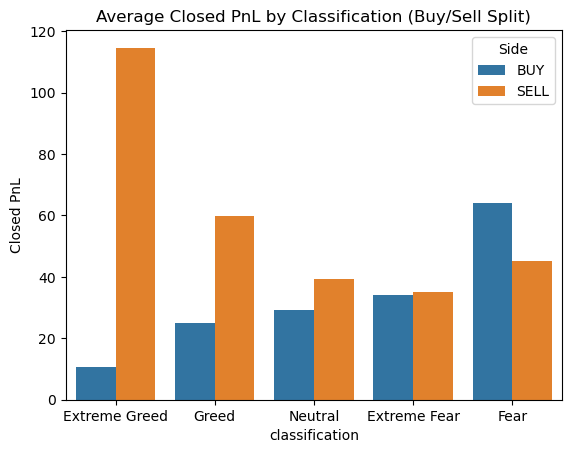

In [57]:
group_1avg_side=merged_df.groupby(["classification","Side"])["Closed PnL"].mean().reset_index().sort_values(by="Closed PnL")
print(group_1avg_side)

sns.barplot(data=group_1avg_side, x="classification", y="Closed PnL", hue="Side")

plt.title("Average Closed PnL by Classification (Buy/Sell Split)")
plt.show()

- average value of sell in greed and extreme greed is high

- which lead to intersting conclusion : **when whole market is in emotion of buying (as market greedy or extremely greedy) those who are selling coins really making profit which can be shown by high bars of greed and extreme greed**

## Analysis for positive PnL

In [29]:
merged_df["win_PnL"]=merged_df["Closed PnL"]>0

In [30]:
win_avg=merged_df[merged_df["win_PnL"]==True].groupby("classification")["Closed PnL"].mean().reset_index().sort_values(by="Closed PnL")
win_avg

,classification,Closed PnL
4,Neutral,112.439432
2,Fear,151.840935
1,Extreme Greed,160.593269
3,Greed,165.761711
0,Extreme Fear,173.424767


<Axes: xlabel='classification'>

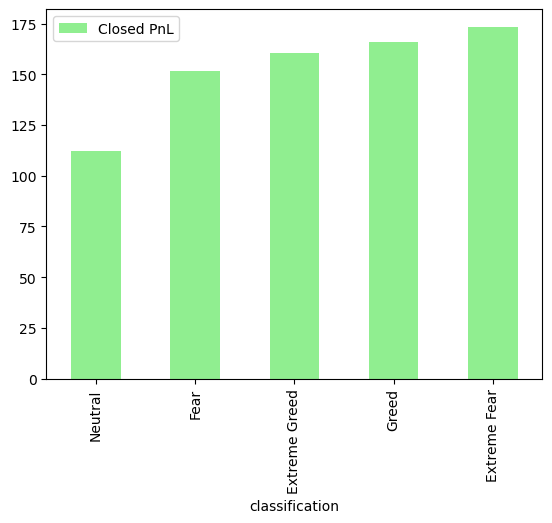

In [31]:
win_avg.plot(kind='bar',x="classification",color="lightgreen")

- for positive value of end PnL(i.e. profit),classification of  average profit values on each trading operations showing highest for Extreme Fear sentiment followed by Greed

- But we can see highly deflection in average when only considering win values in case of Extreme Fear

- **This lead to conclusion that Extreme Fear days sentiment  has high loss compaire to other also Greed sentiment is second loss taker**

### By Side(buy/sell) metric

  classification  Side  Closed PnL
2  Extreme Greed   BUY   72.408762
9        Neutral  SELL   90.896085
5           Fear  SELL  103.221162
1   Extreme Fear  SELL  124.779958
7          Greed  SELL  151.264036
8        Neutral   BUY  161.686775
6          Greed   BUY  187.166042
3  Extreme Greed  SELL  198.471861
4           Fear   BUY  262.125553
0   Extreme Fear   BUY  299.746845


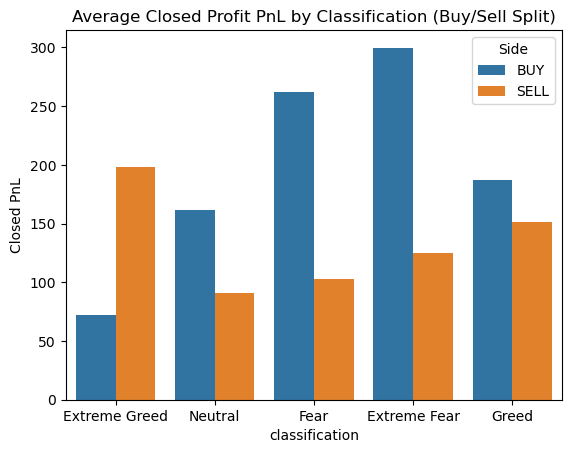

In [58]:
win_PnL_side=merged_df[merged_df["win_PnL"]==True].groupby(["classification","Side"])["Closed PnL"].mean().reset_index().sort_values(by="Closed PnL")
print(win_PnL_side)

sns.barplot(data=win_PnL_side, x="classification", y="Closed PnL", hue="Side")

plt.title("Average Closed Profit PnL by Classification (Buy/Sell Split)")
plt.show()

- average value of buy in fear and extreme fear is high and positive

- which lead to intersting conclusion : when whole market is **in emotion of sailing (as market in fear or extremely fear) those who are buying coins really making profit which can be shown by high bars of fear and extreme fear**

## Analysis for negative PnL

In [32]:
merged_df["loss_PnL"]=merged_df["Closed PnL"]<0

In [33]:
loss_avg=merged_df[merged_df["loss_PnL"]==True].groupby("classification")["Closed PnL"].mean().reset_index().sort_values(by="Closed PnL")
loss_avg

,classification,Closed PnL
0,Extreme Fear,-257.099629
3,Greed,-181.967329
2,Fear,-156.662401
4,Neutral,-121.727849
1,Extreme Greed,-119.920289


<Axes: xlabel='classification'>

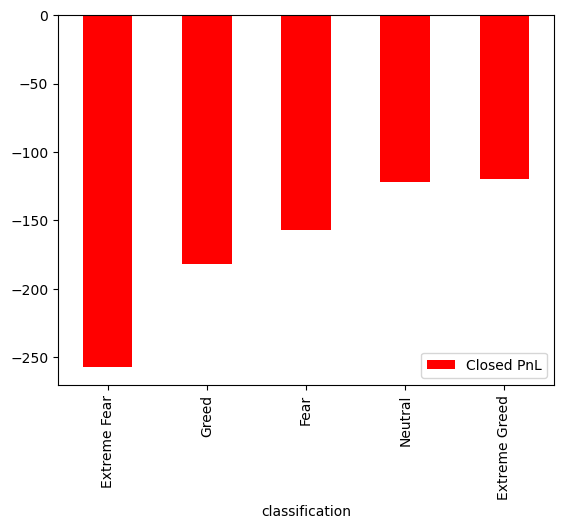

In [34]:
loss_avg.plot(kind='bar',x="classification",color="red")

- conclusion of Analysis for positive PnL is varified by above chart of highest loss of Extreme Fear and Greed sentiment

### By Side(buy/sell) metric

  classification  Side  Closed PnL
0   Extreme Fear   BUY -313.614762
6          Greed   BUY -240.675089
2  Extreme Greed   BUY -236.798463
1   Extreme Fear  SELL -223.778568
5           Fear  SELL -175.351487
8        Neutral   BUY -138.948620
4           Fear   BUY -119.549323
9        Neutral  SELL -109.809981
7          Greed  SELL  -91.651638
3  Extreme Greed  SELL  -40.641111


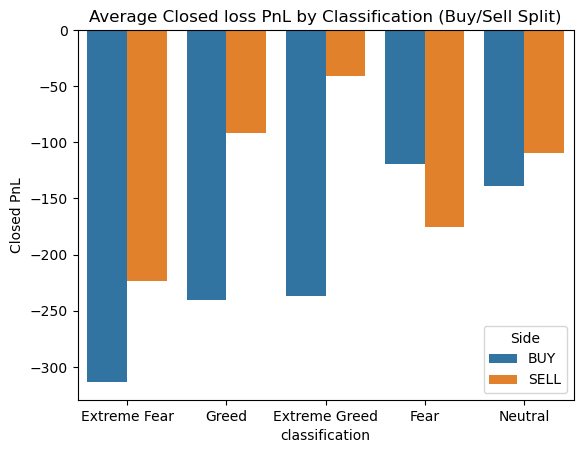

In [59]:
loss_PnL_side=merged_df[merged_df["loss_PnL"]==True].groupby(["classification","Side"])["Closed PnL"].mean().reset_index().sort_values(by="Closed PnL")
print(loss_PnL_side)

sns.barplot(data=loss_PnL_side, x="classification", y="Closed PnL", hue="Side")

plt.title("Average Closed loss PnL by Classification (Buy/Sell Split)")
plt.show()

- While in extreme fear and greed sentiment which are highest loss taker, the more loss cause by buying coin

- **loss is least in case of extreme greed but in that loss most conceive loss trade side was buy** we can check by difference of bar of buy and sell in extreme greed

## Analysis for zero PnL

In [35]:
merged_df["zero_PnL"]=merged_df["Closed PnL"]==0

In [36]:
zero_PnL_count=merged_df[merged_df["zero_PnL"]==True].groupby("classification")["zero_PnL"].count().reset_index().sort_values(by="zero_PnL")
zero_PnL_count

,classification,zero_PnL
0,Extreme Fear,10994
1,Extreme Greed,19139
4,Neutral,19527
3,Greed,25127
2,Fear,32029


<Axes: xlabel='classification'>

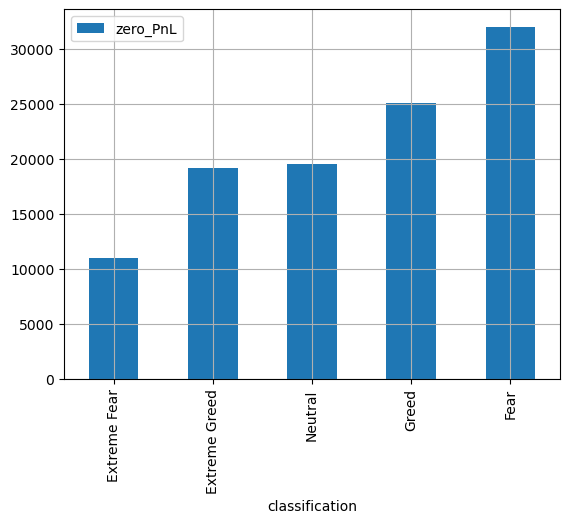

In [37]:
zero_PnL_count.plot(kind='bar',x="classification",grid="Axis grid lines")

- For fear and then greed end PnL zero count is highest 

### By Side(buy/sell) metric

  classification  Side  Closed PnL
1   Extreme Fear  SELL        3182
9        Neutral  SELL        6419
3  Extreme Greed  SELL        7699
0   Extreme Fear   BUY        7812
5           Fear  SELL       10989
2  Extreme Greed   BUY       11440
7          Greed  SELL       11894
8        Neutral   BUY       13108
6          Greed   BUY       13233
4           Fear   BUY       21040


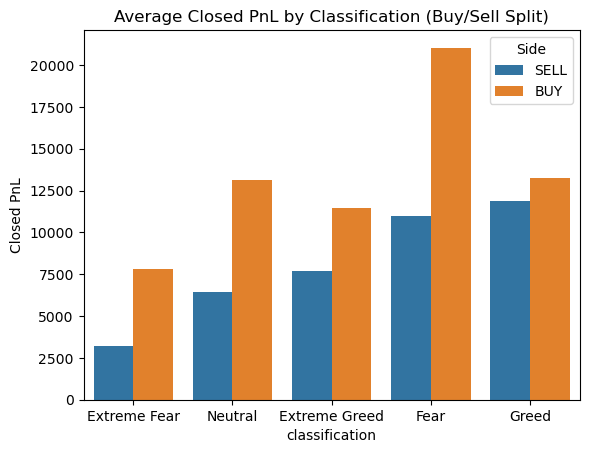

In [60]:
zero_PnL_side=merged_df[merged_df["zero_PnL"]==True].groupby(["classification","Side"])["Closed PnL"].count().reset_index().sort_values(by="Closed PnL")
print(zero_PnL_side)

sns.barplot(data=zero_PnL_side, x="classification", y="Closed PnL", hue="Side")

plt.title("Average Closed PnL by Classification (Buy/Sell Split)")
plt.show()

- We can see more buying for end PnL zero trading operation for every sentiment.

- Also above situation is enhance in case of fear and extreme fear.

- Zero-PnL Buy trades spike during Fear and Extreme Fear, indicating **strong trader hesitation and lack of conviction in bearish sentiment**.

# Overall Analysis

-  **when whole market is in emotion of buying (as market greedy or extremely greedy) those who are selling coins really making profit**

-  **Also VICEVARSA chances of geting end PnL remain positive or high by buying coins in selling sentiment market**
  
-  **Extreme Fear days sentiment  has high loss compaire to other also Greed sentiment is second loss taker**

  
-  **Avoid trade operation of buying in extreme greedy sentiment days to avoid PnL loss**

-  **There is strong trader hesitation and lack of conviction in bearish sentiment(Fear,Extreme Fear)**